# Understanding Descriptive Statistics

Import the necessary libraries here:

In [115]:
# Libraries

import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [118]:
# your code here

dice = [1,2,3,4,5,6]

def rollingdice(dice):
    return random.choices(dice,k = 10)


rolling_dice = pd.DataFrame(rollingdice(dice),columns = ["nums"])

rolling_dice

,nums
0,1
1,1
2,3
3,5
4,6
5,4
6,6
7,1
8,5
9,4


#### 2.- Plot the results sorted by value.

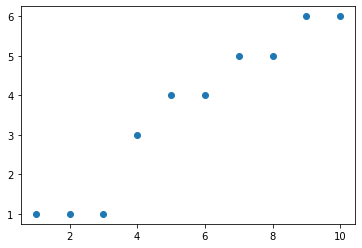

In [119]:
# your code here

df = rolling_dice.sort_values(by=["nums"])



x=range(1,11)
plt.scatter(x, df)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

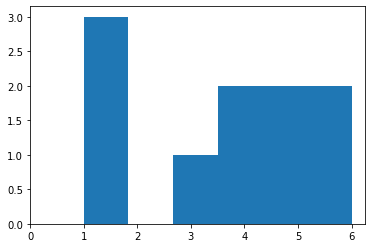

In [120]:
# your code here

plt.hist(df['nums'],bins=6)
plt.xticks(range(0,7))
plt.show()

In [ ]:
"""
your comments here

The histogram gives us information about how many times each number came out
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [121]:
# your code here

def mean_calculator(table):
    mean = sum(table["nums"])/len(table["nums"])
    return mean

mean_calculator(df)

3.6

In [135]:
df

,nums
0,1
1,1
7,1
2,3
5,4
9,4
3,5
8,5
4,6
6,6


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [147]:
# your code here

df2 = pd.value_counts(df.nums)
df3 = pd.DataFrame(df2)
df3["dices"] = df3.index
df3

df4 = df3

df4


df4['Weighet mean'] = df4['nums']*df4['dices']

result = sum(df4['Weighet mean'])/sum(df4["nums"])

result

3.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [168]:
# your code here

df_index= df.reset_index(drop=True)

len(df_index)/2

median = (df_index["nums"][4] + df_index["nums"][5])/2

median

    

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [262]:
# your code here

df_index.nums.quantile([0.25,0.5,0.75,1])

0.25    1.5
0.50    4.0
0.75    5.0
1.00    6.0
Name: nums, dtype: float64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [195]:
# your code here

roll_dice_hundred = pd.read_csv('roll_the_dice_hundred.csv')

roll_dice_hundred

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


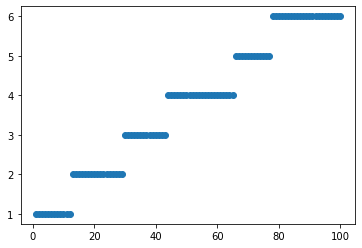

In [211]:
roll_dice_hundred


df_100 = roll_dice_hundred["value"]


df_100 = df_100.sort_values()




df_100index= df_100.reset_index(drop=True)

df_100index


x=range(1,101)
plt.scatter(x, df_100index)
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [214]:
# your code here

def mean_calculator(table):
    mean = sum(table["value"])/len(table["value"])
    return mean


mean_calculator(roll_dice_hundred)

3.74

#### 3.- Now, calculate the frequency distribution.


In [224]:
# your code here
df= pd.DataFrame(df_100.reset_index(drop=True))
df

df2 = pd.value_counts(df.value)


df2

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

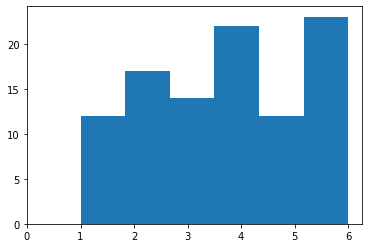

In [225]:
# your code here

plt.hist(df['value'],bins=6)
plt.xticks(range(0,7))
plt.show()


In [ ]:
"""
your comments here

After analyzing the histogram, we can see that there are 2 levels of data. Those that go higher than 15 and lower.
For the ones that a are lower than 15 we can see that the most common values are the ones that go from 3 to 4, so it will
match with mean value that it is 3,75

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

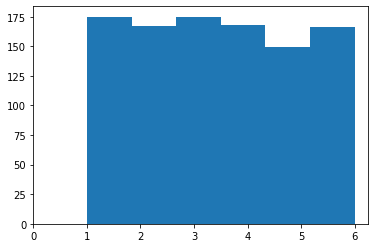

In [230]:
# your code here

roll_dice_thousand = pd.read_csv('roll_the_dice_thousand.csv')

roll_dice_thousand 

df_1000 = roll_dice_thousand ["value"]


df_1000 = df_1000.sort_values()

df= pd.DataFrame(df_1000.reset_index(drop=True))
df


plt.hist(df['value'],bins=6)
plt.xticks(range(0,7))
plt.show()




In [ ]:
"""
your comments here

As many times as we roll the dice the number of outcomes get closer. This is because the prob of getting
any number is the same, so as many times we roll the dice we are obtaining the different outcomes at the same level.

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

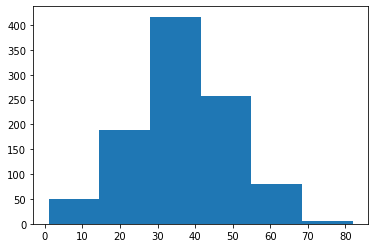

In [233]:
# your code here

ages_population = pd.read_csv('ages_population.csv')

ages_population


plt.hist(ages_population['observation'],bins=6)
plt.show()


# The most common values are between 30 and 40 so I would locate the mean within this range.

# We can see that we will have a desviation in the extrems as we have very low popuplation in 0-12 & 68-80 years.


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [235]:
# your code here

print(ages_population.mean()) 

print(ages_population.std()) 

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
your comments here

The mean is located where we guessed. As per Standard Desviation of 12,81, it will correspond to the extrems that we have
mentioned.


"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

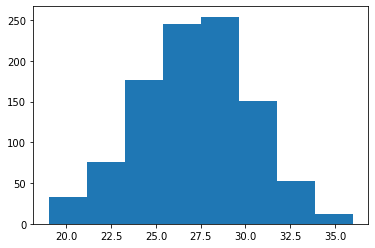

In [240]:
# your code here

ages_population2 = pd.read_csv('ages_population2.csv')

ages_population2

plt.hist(ages_population2['observation'],bins=8)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

Yes there is. In that case we don't have that many extreme values and the values are more concentrated.


"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [241]:
# your code here

print(ages_population2.mean()) 

print(ages_population2.std()) 

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
your comments here


As we can see standard desviation is lower than in previous excercices. That is because the numbers aren't that spread.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

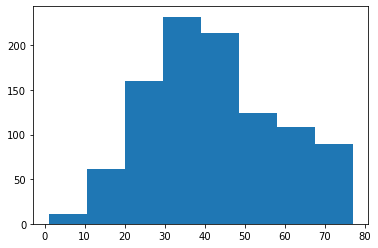

In [243]:
# your code here

ages_population3 = pd.read_csv('ages_population3.csv')

ages_population3


plt.hist(ages_population3['observation'],bins=8)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [245]:
# your code here

print(ages_population3.mean()) 

print(ages_population3.std()) 

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
your comments here

In that case we having a symilar standard desviation than in step 1. This is because our data is more spread as it goes from 0 to 80. 

As per step 2 our data was only from 20-35 so it was less spread.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [249]:
ages_population3

ages_population3_sort = ages_population3.sort_values(by="observation")

ages_population3_sort

,observation
263,1.0
924,2.0
415,2.0
639,4.0
698,4.0
...,...
76,75.0
323,75.0
12,76.0
937,77.0


In [251]:
# your code here

ages_population3_sort.observation.quantile([0.25,0.5,0.75,1])

0.25    30.0
0.50    40.0
0.75    53.0
1.00    77.0
Name: observation, dtype: float64

In [ ]:
"""
There is a slightly difference between median and mean but it's not significant. This is because we have
a symmetric distribution and the distriution have 0 skewkness.

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [263]:
# your code here


p = np.percentile(ages_population3_sort, 50) # return 50th percentile, e.g median.

p

40.0

In [ ]:
"""
your comments here

As we said, 50% of the data is located it's above 40.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [257]:
# your code here

ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [258]:
ages_population2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [259]:
ages_population3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here


--> Standard desviation is higher in 1 & 3 this is because we have a spread data than in population 2. 
--> The three observation mean and 50% quartile are very symilar, that means that we have a symetrical distrubtion
with 0 skewness.

-->I would say that population 2 gives us a more accurate information about the population as it has less spread data
and lower standard desviation. Otherwise, it's just taking ages from 27-35

-->Population 1&2 have a standard desviation so when we consider the data we have to take it into account that we have
a more spreaded data.

"""